# Memory task initial data exploration
## Matt Oberhardt



### Imports & API calls:

In [1]:
import synapseclient
from synapseclient import Project, Folder, File
import pandas as pd
import json
import pickle
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
import os
%load_ext autoreload
%matplotlib inline  
# from pandas import DataFrame, Series
np.set_printoptions(threshold='nan') # so that i can print as many lines as i want


In [2]:
import memorytools as mt

### Load up the memory & demographic data:

In [3]:
# initialize environment:
synuser = os.environ['SYNAPSE_USER']
synpass = os.environ['SYNAPSE_PASS']
mt.loadSynapseRecordsFromScratch = False
syn, memory, memorysyn, filePaths, demographics, demosyn, data = mt.create_memory_environment(synuser, synpass)
data = mt.filter_data_for_popular_phones(data)


Welcome, Matthew Oberhardt!
(phones are now filtered for only the most popular ones)


In [4]:
# pull out features from games:
fromFile = True#False
toSave = False#True
data = mt.add_memory_game_features_to_data(filePaths, data, fromFile = fromFile, toSave=toSave, outFileName='memory_data_with_features.p')


memory features loaded from file: memory_data_with_features.p (input data was ignored)


### Visualize the memory data:

#### Columns:

In [5]:
# columns:
for col in data.columns:
    print col

recordId
healthCode
createdOn
appVersion
phoneInfo
game_score
game_numGames
game_numFails
game_startDate
game_endDate
game_records
medTimepoint
game_records_txt
recordId_demographic
createdOn_demographic
appVersion_demographic
phoneInfo_demographic
age
isCaretaker
brainStim
diagYear
education
employment
gender
healthHistory
healthcareProvider
homeUsage
lastSmoked
maritalStatus
medicalUsage
medicalUsageYesterday
medicationStartYear
onsetYear
packsPerDay
pastParticipation
phoneUsage
professionalDiagnosis
race
smartphone
smoked
surgery
videoUsage
yearsSmoking
hasParkinsons
gamesdata
16_latency
16_gamescore
16_successful
16_meanDt
16_meandist
16_gamesize
16_meanunsuccessfuldist
16_meansuccessfuldist
16_numunsuccesses
16_numsuccesses
16_firstdist
9_latency
9_gamescore
9_successful
9_meanDt
9_meandist
9_gamesize
9_meanunsuccessfuldist
9_meansuccessfuldist
9_numunsuccesses
9_numsuccesses
9_firstdist
4_latency
4_gamescore
4_successful
4_meanDt
4_meandist
4_gamesize
4_meanunsuccessfuldist
4_mea

In [6]:
# How many nans in each column?
mt.display_num_nulls_per_column(data)



Number of nulls per column:

recordId                      0
phoneInfo_demographic         0
appVersion_demographic        0
createdOn_demographic         0
gamesdata                     0
game_records_txt              0
game_records                  0
game_endDate                  0
recordId_demographic          0
game_numFails                 0
game_startDate                0
healthCode                    0
createdOn                     0
appVersion                    0
hasParkinsons                 0
game_score                    0
game_numGames                 0
phoneInfo                     0
9_numsuccesses                2
9_numunsuccesses              2
9_gamesize                    2
9_meandist                    2
9_successful                  2
9_gamescore                   2
9_latency                     2
9_firstdist                   2
medTimepoint                  4
smartphone                    5
gender                        5
phoneUsage                    6
9_meanDt   

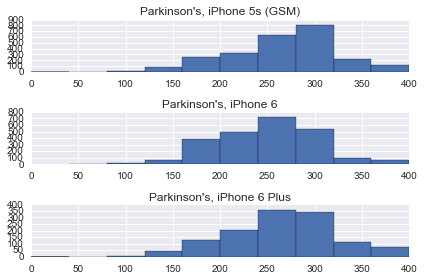

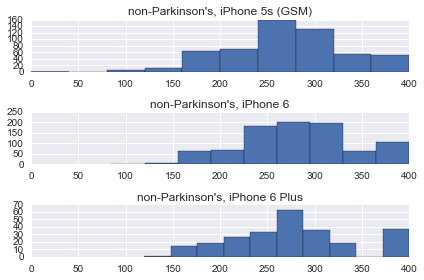

In [7]:
# compare these for parkinson's and non-parkinson's
# do on same plot too

# todo check if the scores are different, within parkinson's category, for phone type!

byphonePark = data[data.hasParkinsons==True].groupby('phoneInfo')
byphonenonPark = data[data.hasParkinsons==False].groupby('phoneInfo')

grouped = byphonePark
plt.figure()
numphones = len(grouped)
allphones = grouped.phoneInfo.unique()
for n, phone in enumerate(allphones):
    plt.subplot(len(allphones),1,n+1)
    data.game_score[grouped.groups[phone[0]]].hist()
    plt.title("Parkinson's, %s" % phone[0])
plt.tight_layout()

grouped = byphonenonPark
plt.figure()
numphones = len(grouped)
allphones = grouped.phoneInfo.unique()
for n, phone in enumerate(allphones):
    a = plt.subplot(len(allphones),1,n+1)
    data.game_score[grouped.groups[phone[0]]].hist()
    plt.title("non-Parkinson's, %s" % phone[0])
    a.set_xlim([0,400])
plt.tight_layout()

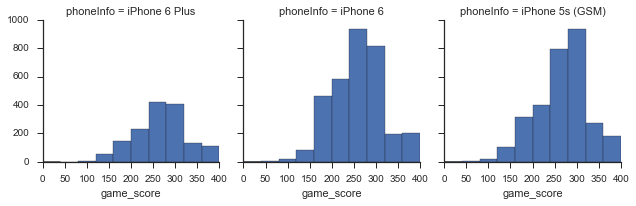

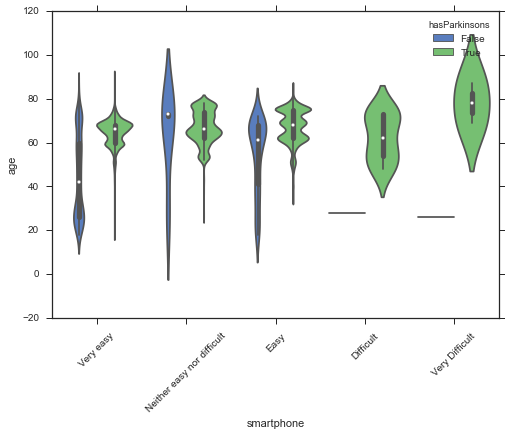

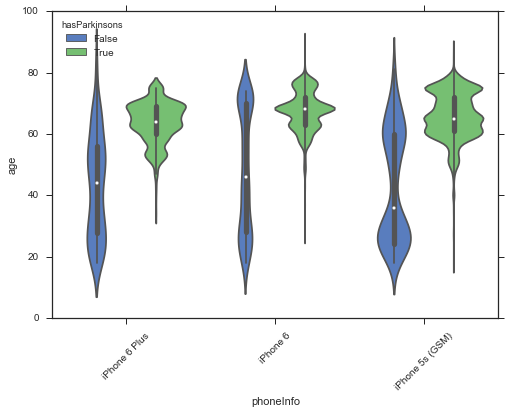

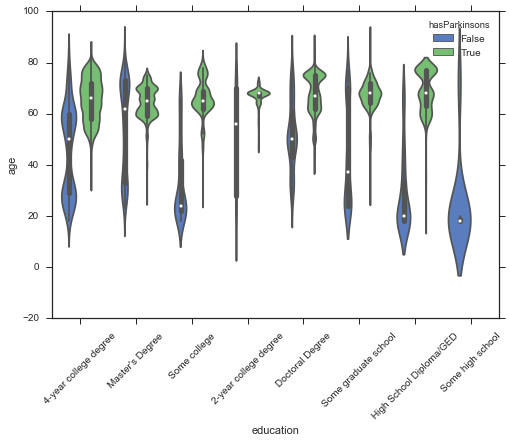

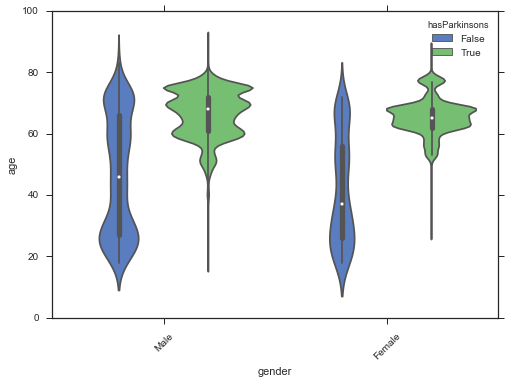

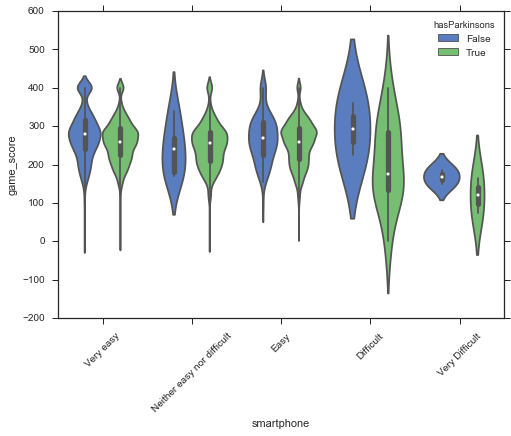

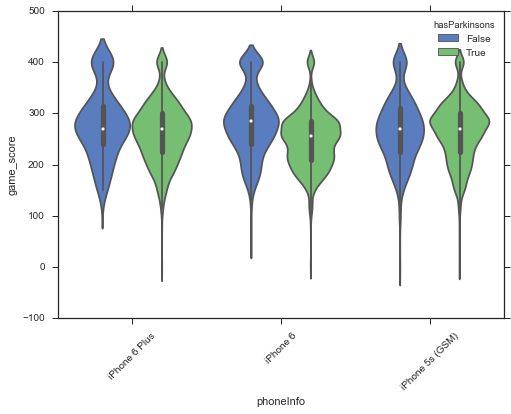

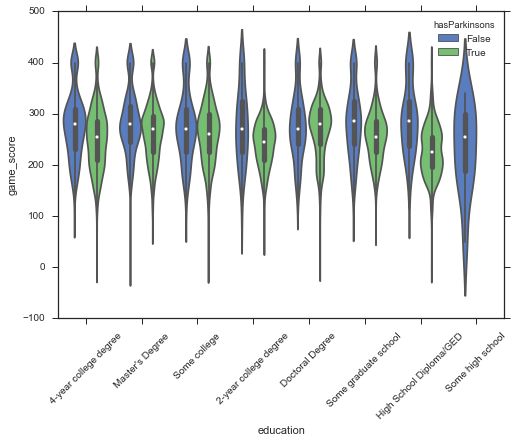

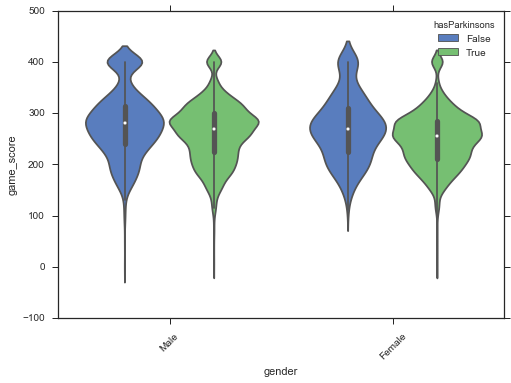

In [8]:
sns.set(style="ticks", color_codes=True)

features_to_check_against_Parkinsons = ["game_score","age",
        "game_numFails", "phoneInfo", "education", "gender", 
        "phoneUsage", "smartphone"]
            
otherfeatures =  ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist']
#ax1 = sns.violinplot(x="phoneInfo", y="game_score", hue="hasParkinsons", data=data, palette="muted")#, split=True)    
#ax2 = sns.violinplot( y="game_score", hue="hasParkinsons", data=data, palette="muted", split=True)    

#features_to_check = ['phoneInfo, BLAST']
g = sns.FacetGrid(data, col="phoneInfo")
g = g.map(plt.hist, "game_score")

yvar = 'hasParkinsons'
catvars = ['smartphone', 'phoneInfo', 'education', 'gender']
freqvars = ['age', 'game_score']

for freqvar in freqvars:
    for catvar in catvars:
        plt.figure()
        ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=data, palette="muted")#, split=True)    
        plt.xticks(rotation=45)



Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']


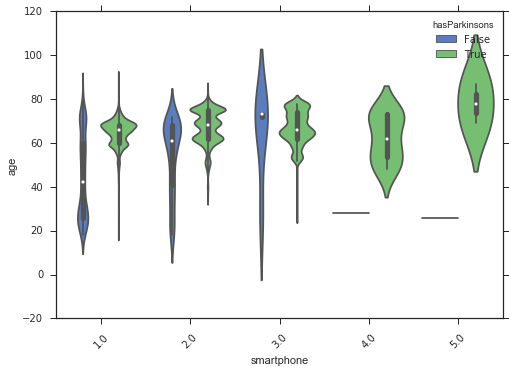

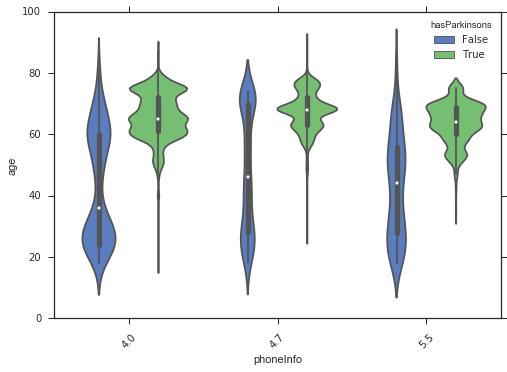

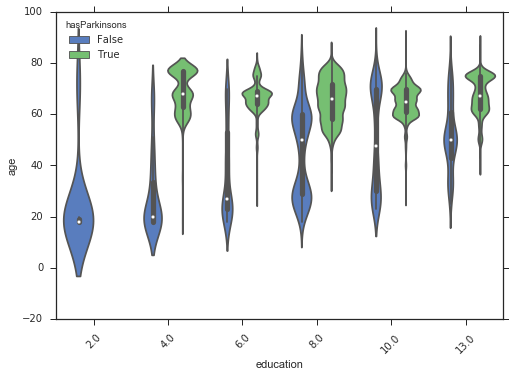

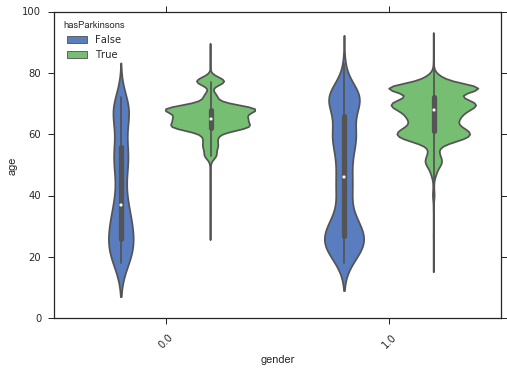

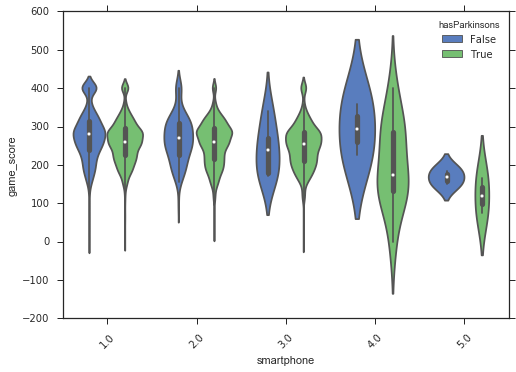

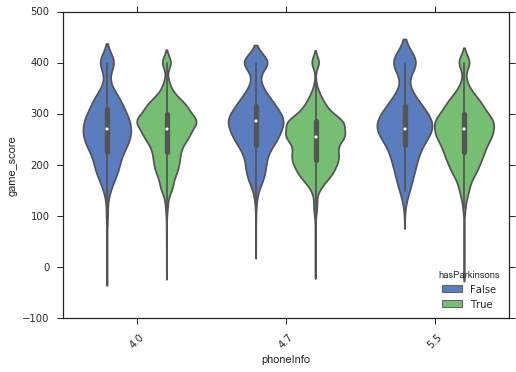

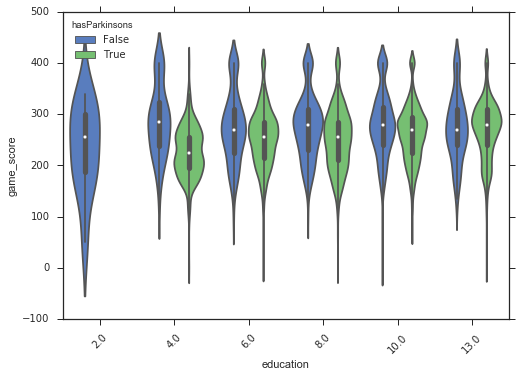

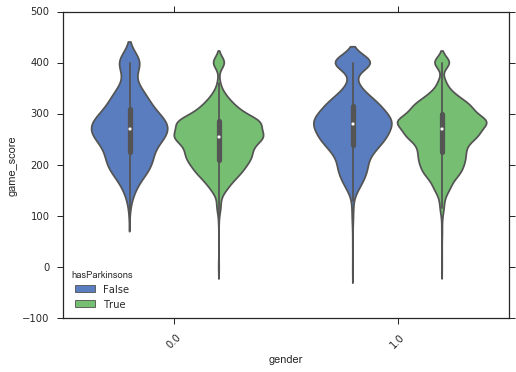

In [373]:
# revisualize after turning categorical-ordered into #'s:
features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features_df = data[features]
features_df = mt.convert_features_to_numbers(features_df)

yvar = 'hasParkinsons'
catvars = ['smartphone', 'phoneInfo', 'education', 'gender']
freqvars = ['age', 'game_score']

for freqvar in freqvars:
    for catvar in catvars:
        plt.figure()
        ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=features_df, palette="muted")#, split=True)    
        plt.xticks(rotation=45)

        

## Troubleshoot the features from the game:

In [9]:
#data[['16_meansuccessfuldist','16_meanunsuccessfuldist']]

In [10]:
### look at one record where meansuccessfuldist > meanunsuccessfuldist -- that is wierd (might be a bug)
#rowidx = 7944
#print data['recordId'][rowidx]
#games = data['gamesdata'][rowidx]['games_by_sizes']
#games
##data['recordId'][rowidx]
## problem here... 

In [11]:
#games16 = games[16]
#avg_memory_features = mt.average_features_from_memory_games(games16)
#
##memory_features = mt.pull_features_from_memory_game(game)
##memory_features

#avg_memory_features
### It seems that the MemoryGameTouchSampleIsCorrect field is WRONG here!?, for the 1st result from game 16.

# Machine learning

### Imports & API calls:

In [12]:
from sklearn import linear_model
import sklearn
import sklearn.linear_model
import sklearn.cross_validation
import sklearn.tree
import sklearn.ensemble
import numpy as np
from sklearn.utils.validation import check_consistent_length, _num_samples
import sklearn.preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Pick & process features, 1st logistic regression:

In [13]:
##### define features:

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features_df = data[features]

features_df = mt.convert_features_to_numbers(features_df)
features_df = mt.move_col_to_end_of_df(features_df, 'hasParkinsons')

# do more processing here, in case of features with lots of nas

# drop na rows:
features_df = features_df.dropna()

# convert to matrices for machine learning:
labelcol = 'hasParkinsons'
X, y, X_names, y_name = mt.convert_features_df_to_X_and_y_for_machinelearning(features_df, labelcol)
    
###### perform logistic regression

# do cross validation manually:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale features:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# create logistic regression model:
lr = LogisticRegression(C=1000.0, random_state=0)##
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
lr.fit(X_train_std, y_train)


###### assess regression performance:
lr.coef_
lr.intercept_ # this is the 0 coeff?
lr.fit(X_train_std, y_train)
print 'training accuracy:', lr.score(X_train_std, y_train)
print 'test accuracy:', lr.score(X_test_std, y_test) # suspiciously high..
lr.intercept_
lr.coef_ # only using 4 features.. which ones?
# mt.plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(len(X_train_std),len(X_combined_std)+1))
X_names_heavy = X_names[np.where(np.abs(lr.coef_) > 0.1)[1]]
Scoef = mt.convert_regression_coefs_to_pdSeries(lr.coef_, X_names)

print '\n'
print Scoef.sort_values()
#print lr.score
# tp / (tp + fn)

# look at sklearn.metrics

pass


Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 0.888564654386
test accuracy: 0.881327094853


phoneUsage      -0.726648
gender          -0.535846
education       -0.091916
game_score       0.030728
game_numFails    0.104056
phoneInfo        0.126661
age              1.523501
smartphone       1.527187
dtype: float64


### Try logistic regression, inputting the hasParkinsons column as a feature
#### (should give perfect prediction)

In [14]:

##### define features:
features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features_df = data[features]
features_df['hasParkinsons2'] = data['hasParkinsons']

features_df = mt.convert_features_to_numbers(features_df)
features_df = mt.move_col_to_end_of_df(features_df, 'hasParkinsons')

# do more processing here, in case of features with lots of nas

# drop na rows:
features_df = features_df.dropna()

# convert to matrices for machine learning:
labelcol = 'hasParkinsons'
X, y, X_names, y_name = mt.convert_features_df_to_X_and_y_for_machinelearning(features_df, labelcol)
    
###### perform logistic regression

# do cross validation manually:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale features:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# create logistic regression model:
lr = LogisticRegression(C=1000.0, random_state=0)##
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
lr.fit(X_train_std, y_train)


###### assess regression performance:
lr.coef_
lr.intercept_ # this is the 0 coeff?
lr.fit(X_train_std, y_train)
print 'training accuracy:', lr.score(X_train_std, y_train)
print 'test accuracy:', lr.score(X_test_std, y_test) # suspiciously high..
lr.intercept_
lr.coef_ # only using 4 features.. which ones?
# mt.plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(len(X_train_std),len(X_combined_std)+1))
X_names_heavy = X_names[np.where(np.abs(lr.coef_) > 0.1)[1]]
Scoef = mt.convert_regression_coefs_to_pdSeries(lr.coef_, X_names)

print '\n'
print Scoef.sort_values()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 1.0
test accuracy: 1.0


phoneUsage       -0.116390
gender           -0.104257
game_score       -0.069913
education         0.006747
game_numFails     0.077573
phoneInfo         0.096486
smartphone        0.187908
age               0.625051
hasParkinsons2    9.381030
dtype: float64


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### that works well. good.

### Add memory features to model, & redo logistic regression

In [15]:
# How many nans in each column?
numnulls = data.isnull().sum()
pd.set_option('display.max_rows', len(numnulls))
numnulls.sort_values(inplace=True, ascending=True)
print 'Number of nulls per column:\n'
print numnulls

Number of nulls per column:

recordId                      0
phoneInfo_demographic         0
appVersion_demographic        0
createdOn_demographic         0
gamesdata                     0
game_records_txt              0
game_records                  0
game_endDate                  0
recordId_demographic          0
game_numFails                 0
game_startDate                0
healthCode                    0
createdOn                     0
appVersion                    0
hasParkinsons                 0
game_score                    0
game_numGames                 0
phoneInfo                     0
9_numsuccesses                2
9_numunsuccesses              2
9_gamesize                    2
9_meandist                    2
9_successful                  2
9_gamescore                   2
9_latency                     2
9_firstdist                   2
medTimepoint                  4
smartphone                    5
gender                        5
phoneUsage                    6
9_meanDt   

In [16]:
##### define features:
gamefeatures = ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist']
features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features = gamefeatures + features
#features = gamefeatures + ['game_score', 'hasParkinsons']

In [17]:
# transform features, etc.
features_df = data[features]

features_df = mt.convert_features_to_numbers(features_df)
features_df = mt.move_col_to_end_of_df(features_df, 'hasParkinsons')

# do more processing here, in case of features with lots of nas

# drop na rows:
features_df = features_df.dropna()

# convert to matrices for machine learning:
labelcol = 'hasParkinsons'
X, y, X_names, y_name = mt.convert_features_df_to_X_and_y_for_machinelearning(features_df, labelcol)
    
###### perform logistic regression

# do cross validation manually:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale features:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# create logistic regression model:
lr = LogisticRegression(C=1000.0, random_state=0)##
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
lr.fit(X_train_std, y_train)


###### assess regression performance:
lr.coef_
lr.intercept_ # this is the 0 coeff?
lr.fit(X_train_std, y_train)
print 'training accuracy:', lr.score(X_train_std, y_train)
print 'test accuracy:', lr.score(X_test_std, y_test) # suspiciously high..
lr.intercept_
lr.coef_ # only using 4 features.. which ones?
# mt.plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(len(X_train_std),len(X_combined_std)+1))
X_names_heavy = X_names[np.where(np.abs(lr.coef_) > 0.1)[1]]
Scoef = mt.convert_regression_coefs_to_pdSeries(lr.coef_, X_names)

print '\n'
print Scoef.sort_values()

Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 0.891645384896
test accuracy: 0.891489361702


9_gamescore        -0.925850
phoneUsage         -0.750180
gender             -0.584945
9_latency          -0.172239
education          -0.090453
game_score         -0.041914
9_gamesize          0.000000
game_numFails       0.041078
phoneInfo           0.059917
9_firstdist         0.121477
9_meandist          0.487042
9_numsuccesses      0.589335
9_numunsuccesses    1.111960
9_successful        1.447958
smartphone          1.449737
age                 1.519702
dtype: float64


#### Barely affects results...

### Remove features until the model fails

In [18]:
##### define features:
gamefeatures = ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist']
#features = ["game_score","age","game_numFails", "phoneInfo","education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]

#features = gamefeatures + features
features = gamefeatures + ['game_score', 'hasParkinsons']
features.remove('9_successful')
features.remove('9_numunsuccesses')
features.remove('game_score')
features.remove('9_firstdist')
features.remove('9_meandist')
features.remove('9_latency')
features.remove('9_gamescore')
features.remove('9_numsuccesses')

features = ['gender', 'hasParkinsons']

features


['gender', 'hasParkinsons']

In [19]:
# transform features, etc.
features_df = data[features]

features_df = mt.convert_features_to_numbers(features_df)
features_df = mt.move_col_to_end_of_df(features_df, 'hasParkinsons')

# do more processing here, in case of features with lots of nas

# drop na rows:
features_df = features_df.dropna()

# convert to matrices for machine learning:
labelcol = 'hasParkinsons'
X, y, X_names, y_name = mt.convert_features_df_to_X_and_y_for_machinelearning(features_df, labelcol)
    
###### perform logistic regression

# do cross validation manually:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale features:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# create logistic regression model:
lr = LogisticRegression(C=1000.0, random_state=0)##
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
lr.fit(X_train_std, y_train)


###### assess regression performance:
lr.coef_
lr.intercept_ # this is the 0 coeff?
lr.fit(X_train_std, y_train)
print 'training accuracy:', lr.score(X_train_std, y_train)
print 'test accuracy:', lr.score(X_test_std, y_test) # suspiciously high..
lr.intercept_
lr.coef_ # only using 4 features.. which ones?
# mt.plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(len(X_train_std),len(X_combined_std)+1))
X_names_heavy = X_names[np.where(np.abs(lr.coef_) > 0.1)[1]]
Scoef = mt.convert_regression_coefs_to_pdSeries(lr.coef_, X_names)

print '\n'
print Scoef.sort_values()

Features converted to numbers:

['gender']
training accuracy: 0.786494357481
test accuracy: 0.782590233546


gender   -0.511951
dtype: float64


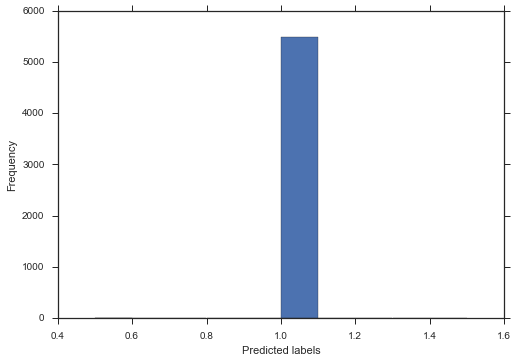

{True}

In [20]:
# look at predictions from model (are they all ones?):
predicted = lr.predict(X_train_std)
plt.hist(predicted)

plt.xlabel('Predicted labels')
plt.ylabel('Frequency')
plt.show()
#predicted.__class__

set(predicted)

# model is outputting all ones...###



### Visualize my features


In [21]:
##### define features:
gamefeatures = ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist']
features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features = gamefeatures + features
features

['9_numsuccesses',
 '9_numunsuccesses',
 '9_gamesize',
 '9_meandist',
 '9_successful',
 '9_gamescore',
 '9_latency',
 '9_firstdist',
 'game_score',
 'age',
 'game_numFails',
 'phoneInfo',
 'education',
 'gender',
 'phoneUsage',
 'smartphone',
 'hasParkinsons']

In [22]:
data['smartphone'].unique()

array(['Very easy', 'Neither easy nor difficult', 'Easy', 'Difficult',
       'Very Difficult', nan], dtype=object)

In [23]:
# How many nans in each column?
mt.display_num_nulls_per_column(data)

Number of nulls per column:

recordId                      0
phoneInfo_demographic         0
appVersion_demographic        0
createdOn_demographic         0
gamesdata                     0
game_records_txt              0
game_records                  0
game_endDate                  0
recordId_demographic          0
game_numFails                 0
game_startDate                0
healthCode                    0
createdOn                     0
appVersion                    0
hasParkinsons                 0
game_score                    0
game_numGames                 0
phoneInfo                     0
9_numsuccesses                2
9_numunsuccesses              2
9_gamesize                    2
9_meandist                    2
9_successful                  2
9_gamescore                   2
9_latency                     2
9_firstdist                   2
medTimepoint                  4
smartphone                    5
gender                        5
phoneUsage                    6
9_meanDt   

### Try Random Forest:

In [121]:
##### define features:

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)       

# create model:
mod = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod.fit(X_train, y_train)

###### assess performance:
mod.fit(X_train, y_train)
print 'training accuracy:', mod.score(X_train, y_train)
print 'test accuracy:', mod.score(X_test, y_test) 
mat = mod.predict_proba(X_test)
print mat
%autoreload 2
# coveariance?

# WORKS!!!!!!!

Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 0.999452854277
test accuracy: 0.97830710336
[[ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.04        0.96      ]
 [ 0.02        0.98      ]
 [ 0.          1.        ]
 [ 0.07        0.93      ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.02        0.98      ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.9975      0.0025    ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.01        0.99      ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.31        0.69      ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 

#### Assess performance

[[ 457   34]
 [  28 1832]]
1860
1866


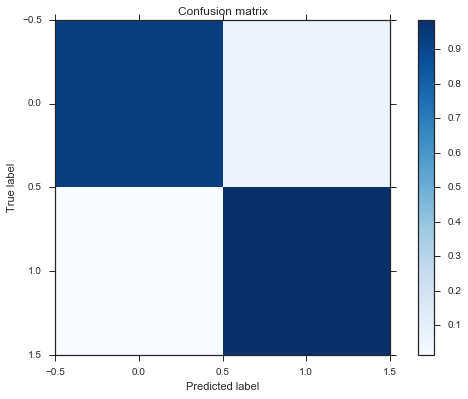

In [104]:
###### get predictions:
y_pred = mod.predict(X_test)
[y_test, y_pred]
sklearn.metrics.roc_auc_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print cm
print sum(y_test)
print sum(y_pred)
sum(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
#    tick_marks = np.arange(len(iris.target_names))
#    plt.xticks(tick_marks, iris.target_names, rotation=45)
#    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm_normalized)

In [105]:
# which features matter?
fi = mod.feature_importances_
fi.__class__
S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()



game_numFails    0.014439
phoneUsage       0.025422
gender           0.044382
education        0.062928
game_score       0.063372
phoneInfo        0.077421
smartphone       0.135858
age              0.576178
Name: feature importances, dtype: float64


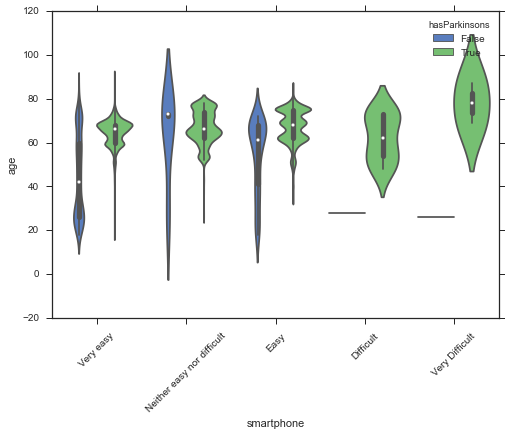

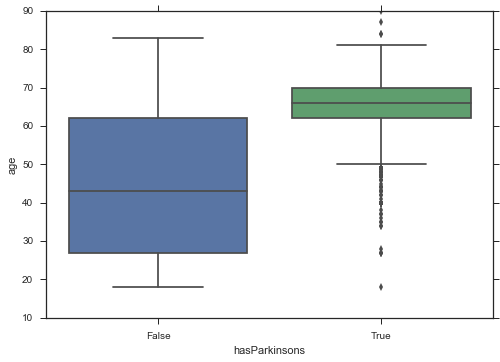

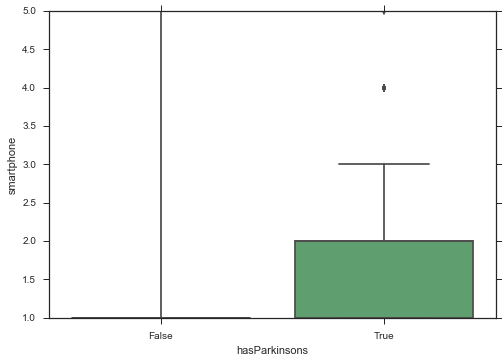

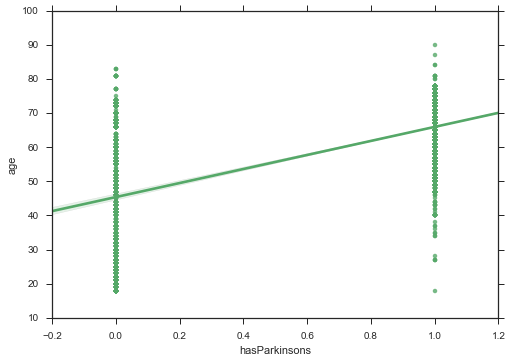

In [106]:
yvar = 'hasParkinsons'
catvar = 'smartphone'#, 'phoneInfo', 'education', 'gender']
freqvar = 'age'#, 'game_score']

plt.figure()
ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=data, palette="muted")#, split=True)    
plt.xticks(rotation=45)


plt.figure()
ax = sns.boxplot(x="hasParkinsons", y="age", data=data)
plt.figure()
ax = sns.boxplot(x='hasParkinsons', y='smartphone', data=features_df)
plt.figure()
ax = sns.regplot(x=data['hasParkinsons'], y=data['age'], color="g")


In [107]:
# age is a confound - remove it & try again..?
# do simple regression to figure out the parkinsons corrected for age...?


In [108]:
# Do analysis per person 

['game_score', 'age', 'game_numFails', 'phoneInfo', 'education', 'gender', 'phoneUsage', 'smartphone', 'hasParkinsons']
[400, 90.0, 4, 'iPhone 6 Plus', 'Some high school', 'Male', 'true', 'Very easy', True]
400.0


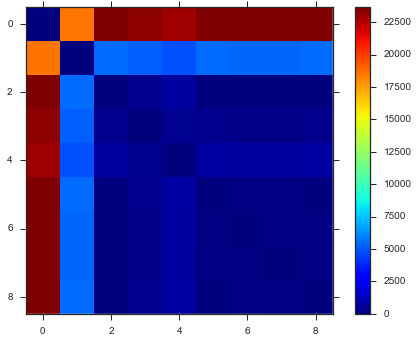

In [109]:
# distance matrix of X matrix (and y-column in there too):
import scipy.spatial.distance as dist
Xy = np.hstack((X, y.reshape(len(y),1)))
dd = dist.pdist(Xy.T, 'euclidean')
dd = dist.squareform(dd)
plt.imshow(dd, interpolation='none', cmap='jet')
plt.colorbar()

print features
print [data[f].max() for f in features]
print Xy.max()


In [118]:
# redo random forest with less features.. (BREAK THE MODEL)
##### define features:

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features.remove('age')
#features.remove('smartphone')
#features.remove('education')
#features.remove('gender')
#features.remove('phoneUsage')
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  

# create model:
mod2 = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod2.fit(X_train, y_train)

###### assess performance:
mod2.fit(X_train, y_train)
print 'training accuracy:', mod2.score(X_train, y_train)
print 'test accuracy:', mod2.score(X_test, y_test) 
mat = mod2.predict_proba(X_test)
#print mat
# which features matter?
fi = mod2.feature_importances_
mod2.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

['gender', 'phoneUsage', 'smartphone', 'education', 'phoneInfo']
training accuracy: 0.908213440175
test accuracy: 0.867884451997
game_numFails    0.034481
phoneUsage       0.061838
gender           0.078583
phoneInfo        0.122896
education        0.180777
game_score       0.252634
smartphone       0.268791
Name: feature importances, dtype: float64


In [117]:
# redo random forest with less features.. (BREAK THE MODEL)
##### define features:

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features.remove('age')
features.remove('smartphone')
#features.remove('education')
#features.remove('gender')
#features.remove('phoneUsage')
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  

# create model:
mod2 = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod2.fit(X_train, y_train)

###### assess performance:
mod2.fit(X_train, y_train)
print 'training accuracy:', mod2.score(X_train, y_train)
print 'test accuracy:', mod2.score(X_test, y_test) 
mat = mod2.predict_proba(X_test)
#print mat
# which features matter?
fi = mod2.feature_importances_
mod2.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

['gender', 'phoneUsage', 'education', 'phoneInfo']
training accuracy: 0.85849572027
test accuracy: 0.803313508921
game_numFails    0.050059
phoneUsage       0.083722
gender           0.088867
phoneInfo        0.154361
education        0.245205
game_score       0.377787
Name: feature importances, dtype: float64


In [119]:
# redo random forest with less features.. (BREAK THE MODEL)
##### define features:
gamefeatures =  ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist']

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features.remove('age')
features.remove('smartphone')
features = features + gamefeatures
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  

# create model:
mod2 = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod2.fit(X_train, y_train)

###### assess performance:
mod2.fit(X_train, y_train)
print 'training accuracy:', mod2.score(X_train, y_train)
print 'test accuracy:', mod2.score(X_test, y_test) 
mat = mod2.predict_proba(X_test)
#print mat
# which features matter?
fi = mod2.feature_importances_
mod2.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

['gender', 'phoneUsage', 'education', 'phoneInfo']
training accuracy: 1.0
test accuracy: 0.821079473013
9_gamesize          0.000000
9_numunsuccesses    0.006041
9_successful        0.006581
9_numsuccesses      0.016456
9_gamescore         0.017036
game_numFails       0.027250
phoneUsage          0.035251
gender              0.046420
phoneInfo           0.071448
education           0.096303
game_score          0.113022
9_firstdist         0.182727
9_meandist          0.183325
9_latency           0.198140
Name: feature importances, dtype: float64


In [120]:
# redo random forest with less features.. (BREAK THE MODEL)
##### define features:
features = ['hasParkinsons', '9_latency', '9_meandist', '9_firstdist','game_score','education']
labelcol = 'hasParkinsons'
features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, stdsc, X_train_std, X_test_std, X_combined_std, y_combined = mt.prep_memory_features_for_machine_learning(data, features, labelcol)  

# create model:
mod2 = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod2.fit(X_train, y_train)

###### assess performance:
mod2.fit(X_train, y_train)
print 'training accuracy:', mod2.score(X_train, y_train)
print 'test accuracy:', mod2.score(X_test, y_test) 
mat = mod2.predict_proba(X_test)
#print mat
# which features matter?
fi = mod2.feature_importances_
mod2.feature_importances_

S = pd.Series(fi, index=X_names, name="feature importances")
print S.sort_values()

Features converted to numbers:

['education']
training accuracy: 1.0
test accuracy: 0.79056924384
education      0.066953
game_score     0.160274
9_latency      0.252958
9_meandist     0.259353
9_firstdist    0.260462
Name: feature importances, dtype: float64


In [ ]:
#

In [ ]:
# LOOK AT INDIVIDUALS, TAKING MEDICINE VS NOT.

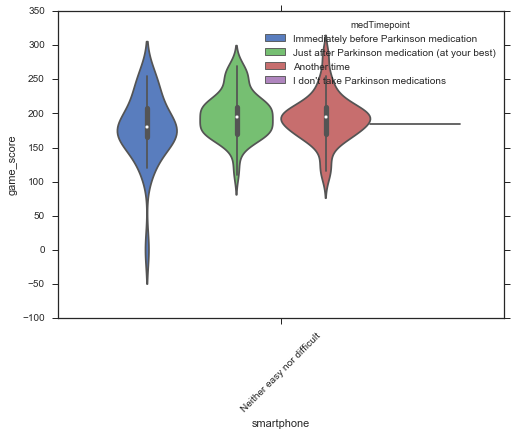

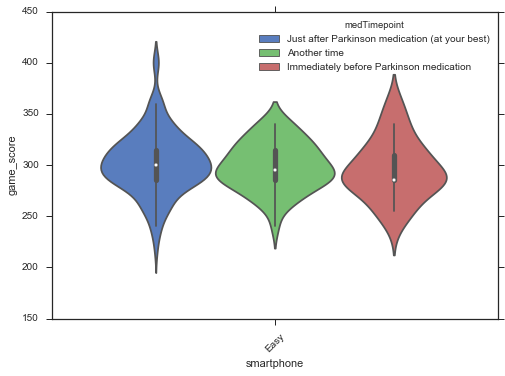

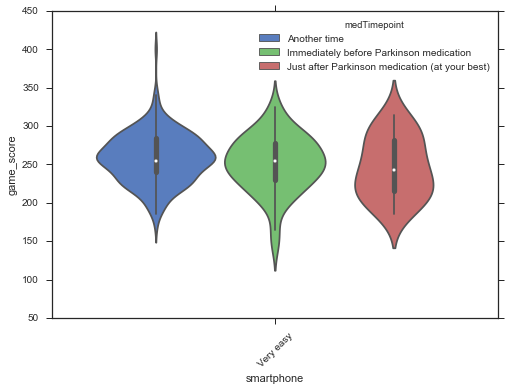

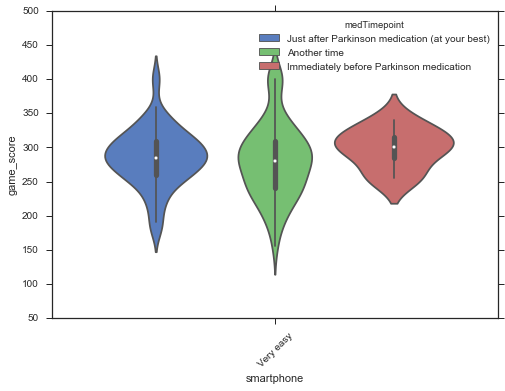

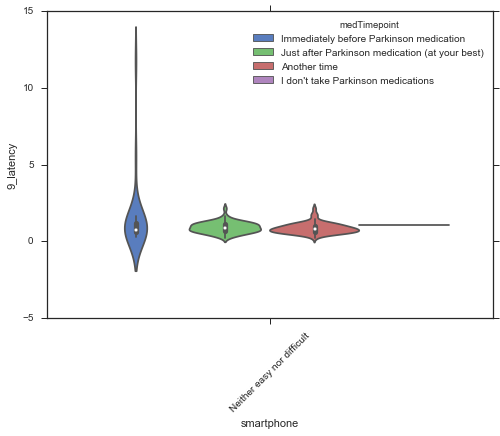

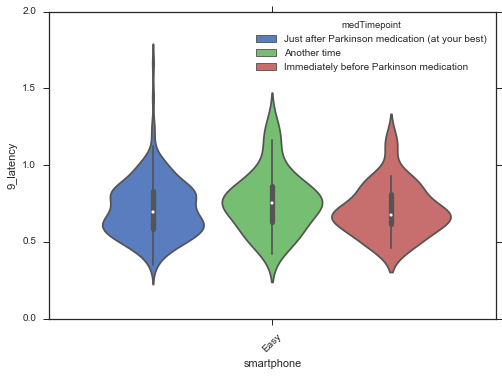

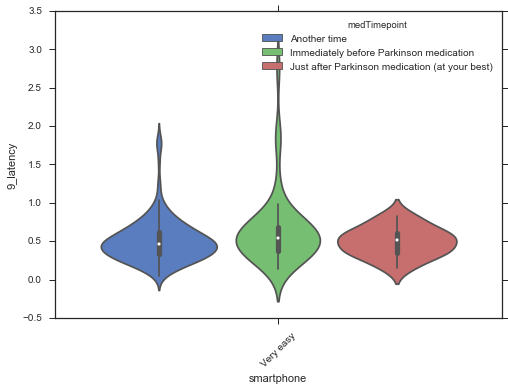

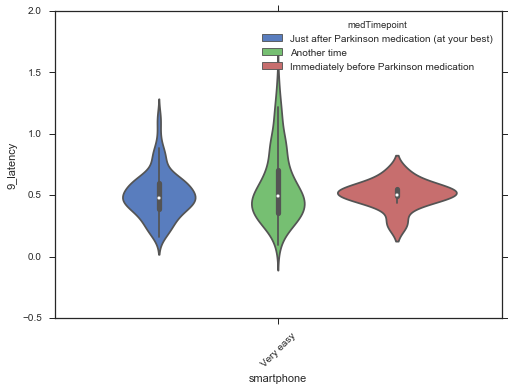

In [130]:
#individuals = data.groupby('healthCode')
individuals = data.loc[data['hasParkinsons']==True].groupby('healthCode')

#yvar = 'hasParkinsons'
#catvars = ['smartphone', 'phoneInfo', 'education', 'gender']
#freqvars = ['age', 'game_score']
yvar = 'medTimepoint'
catvar = 'smartphone'
freqvar = 'game_score'
for id, df in individuals:
    if len(df) > 150:
        plt.figure()
        ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=df, palette="muted")#, split=True)    
        plt.xticks(rotation=45)

yvar = 'medTimepoint'
catvar = 'smartphone'
freqvar = '9_latency'
for id, df in individuals:
    if len(df) > 150:
        plt.figure()
        ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=df, palette="muted")#, split=True)    
        plt.xticks(rotation=45)



        
        
    

In [100]:
# redo random forest adding in the in-game features

In [ ]:
# split data by person and check on drugs vs not on drugs (what is predictive)

